In [1]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
### Reading file with average branch length estimates
df = pd.read_csv("./data/selectStrainsForbranchEstimationAllOU.out",sep = "\t", header = 0)
strains = list(df["strain"])
locs = list(df["region"])
meanT = list(df["ttout"])
df["strain_loc"] = [str(a)+"_"+str(b) for a,b in list(zip(strains,locs))]
T = {strain:tim for strain,tim in list(zip(list(df["strain_loc"]),list(df["ttout"])))}

In [6]:
### Dividing strain-locations into frequent and rare
list(df["strain_loc"])
frequent = {"US137":["US137_3"],"R108":["R108_9","R108_13"],"V19":["V19_5","V19_1","V19_13"],"H986":["H986_1","H986_13","H986_3"],
           "R22":["R22_1","R22_9"],"Yu141":["Yu141_13"],"H276":["H276_9"],"H2098":["H2098_3"],"P122":["P122_9","P122_1"],
            "Yu16":["Yu16_1","Yu16_3"],"H371":["H371_1"],"TR88":["TR88_5","TR88_13"],"H413a":["H413a_3"],
           "H2091":["H2091_3"],"H323":["H323_3"],"DDS298":["DDS298_3"],"DDS93":["DDS93_3"]}
rare = {"R108":["R108_4"],"V19":["V19_12","V19_11"],"P122":["P122_6"],"TR88":["TR88_10","TR88_2"],"H413a":["H413a_14"],
       "P114":["P114_7"],"H323":["H323_8"]}

In [7]:
### Taking pairs of frequent and rare IRs for same strains
Data = []
for samp in rare.keys():
    if samp in list(frequent.keys()):
        para = [rare[samp], frequent[samp]]
        Data.append(para)
D = []
for ele in Data:
    if len(ele[0]) == 1:
        r1 = ele[0][0]
        r2 = random.sample(ele[1],1)[0]
        D.append([r1,r2])
    elif len(ele[0]) == 2:
        r1 = random.sample(ele[0],1)[0]
        t1 =[i for i in ele[0] if i != r1][0]
        r2 = random.sample(ele[1],1)[0]
        rest = [j for j in ele[1] if j != r2]
        t2 = random.sample(rest,1)[0]
        D.append([r1,r2])
        D.append([t1,t2])
D

[['R108_4', 'R108_9'],
 ['V19_11', 'V19_1'],
 ['V19_12', 'V19_5'],
 ['P122_6', 'P122_1'],
 ['TR88_10', 'TR88_5'],
 ['TR88_2', 'TR88_13'],
 ['H413a_14', 'H413a_3'],
 ['H323_8', 'H323_3']]

In [9]:
### Estimating branch length difference for rare and frequent IRs
s,rT,fT = [],[],[]
for ele in D:
    s.append(ele[0].split("_")[0])
    #print(ele[0])
    #print(ele[1])
    rT.append(T[ele[0]])
    fT.append(T[ele[1]])
dT = pd.DataFrame({"strain":s,"timeR":rT,"timeF":fT})
dT["diff"] = dT["timeF"] - dT["timeR"]
dT["diff2"] = dT["diff"].apply(lambda x: np.sqrt(np.absolute(x)))

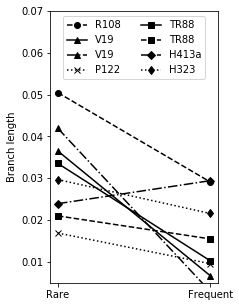

In [13]:
### Plotting average branch lengths for rare and frequent IRs in pairs
markers = ['ko--','k^-','k^-.','kx:','ks-','ks--','kD-.','kd:']
plt.figure(figsize=(3,5))
ax = plt.subplot(111)
ax.set_ylim([0.005,0.07])
i=0
for a,b,c in zip(list(dT["timeR"]),list(dT["timeF"]),list(dT["strain"])):
    #ax.plot(["Rare","Frequent"],[a,b],'-o',label = c)
    ax.plot(["Rare","Frequent"],[a,b],markers[i],label = c)
    i+=1
ax.legend(ncol=2,loc="upper center")
#plt.title('Branch length for rare and frequent regions')
plt.ylabel('Branch length')
plt.savefig('plot_branch_length_comparison.png')
#plt.savefig('Branch_length_comparison.pdf')

/home/anna/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


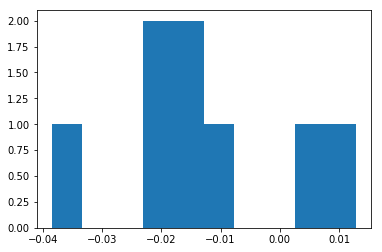

In [221]:
### For the paired T-test difference between timeR and timeF has to be normally distributed
k2, p = stats.normaltest(list(dT["diff2"]))
plt.hist(list(dT["diff"]))
plt.show()


In [11]:
### Wilcoxon test for difference in branch length between rare and frequent IRs
T, p = stats.wilcoxon(list(dT["timeR"]),list(dT["timeF"]))
T, p

/home/anna/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


(1.0, 0.017290280592906253)